In [21]:
import os
import pandas as pd
import statsmodels.api as sm 
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
CSV_PATH = '/workspaces/Tracking-Gazes-on-Museum-Pieces-Data-Plus/data'
DEMOGRAPHIC_DATA = '/workspaces/Tracking-Gazes-on-Museum-Pieces-Data-Plus/demographic.xlsx'

def concat_df(CSV_PATH):
    df = pd.DataFrame()
    for folder in os.listdir(CSV_PATH):
        temp_path = os.path.join(CSV_PATH, folder, 'gaze.csv')
        temp_df = pd.read_csv(temp_path)
        temp_df['folder_id'] = folder
        df = pd.concat([df, temp_df])
    return df

demographic_data = pd.read_excel(DEMOGRAPHIC_DATA)
gaze_df = concat_df(CSV_PATH)
print('Participant count', gaze_df['section id'].nunique())
gaze_df = pd.merge(demographic_data, gaze_df, left_on='codice_eyetr_museo', right_on='folder_id', how='right')
gaze_df.replace({'m': 0, 'f': 1}, inplace=True)
print('Row count', gaze_df.shape[0])
print('Participant count', gaze_df['section id'].nunique())
print('Participant count', gaze_df['codice_eyetr_museo'].nunique())
display(gaze_df.head())

Participant count 15
Row count 189414
Participant count 15
Participant count 15


,School or degree course,Age,Educational Qualification,sesso,codice_eeg_lab,codice_eyetr_lab,codce_eeg_museo,codice_eyetr_museo,Unnamed: 10,vts,section id,recording id,timestamp [ns],gaze x [px],gaze y [px],worn,fixation id,blink id,folder_id
0,filologia,46,laurea magistrale,0,NaN,NaN,2022_24am,2022_24bm,NaN,NaN,b039bef1-92a5-45d2-a73e-05e1758c0c8c,90bcfb34-bdf6-4f33-82e1-f0a94bd0d6b4,1649775196704687470,649.461,340.887,1.0,NaN,NaN,2022_24bm
1,filologia,46,laurea magistrale,0,NaN,NaN,2022_24am,2022_24bm,NaN,NaN,b039bef1-92a5-45d2-a73e-05e1758c0c8c,90bcfb34-bdf6-4f33-82e1-f0a94bd0d6b4,1649775196708704470,649.682,346.563,1.0,NaN,NaN,2022_24bm
2,filologia,46,laurea magistrale,0,NaN,NaN,2022_24am,2022_24bm,NaN,NaN,b039bef1-92a5-45d2-a73e-05e1758c0c8c,90bcfb34-bdf6-4f33-82e1-f0a94bd0d6b4,1649775196712663470,649.030,346.605,1.0,NaN,NaN,2022_24bm
3,filologia,46,laurea magistrale,0,NaN,NaN,2022_24am,2022_24bm,NaN,NaN,b039bef1-92a5-45d2-a73e-05e1758c0c8c,90bcfb34-bdf6-4f33-82e1-f0a94bd0d6b4,1649775196716686470,625.863,353.154,1.0,NaN,NaN,2022_24bm
4,filologia,46,laurea magistrale,0,NaN,NaN,2022_24am,2022_24bm,NaN,NaN,b039bef1-92a5-45d2-a73e-05e1758c0c8c,90bcfb34-bdf6-4f33-82e1-f0a94bd0d6b4,1649775196724693470,628.950,364.969,1.0,NaN,NaN,2022_24bm


### Exploratory Data Analysis

In [2]:
display(gaze_df.describe())
print(gaze_df['School or degree course'].value_counts())
print(gaze_df['Educational Qualification'].value_counts())
print(gaze_df['sesso'].value_counts())

,Age,sesso,Unnamed: 10,vts,timestamp [ns],gaze x [px],gaze y [px],worn,fixation id,blink id
count,164568.000000,164568.000000,0.0,0.0,1.645680e+05,164568.000000,164568.000000,164568.0,109938.000000,2719.000000
mean,24.747284,0.624629,NaN,NaN,1.642395e+18,513.343116,532.091217,1.0,62.407057,5.124678
std,9.654018,0.484220,NaN,NaN,7.203259e+15,171.153798,128.232245,0.0,41.015873,2.892146
min,17.000000,0.000000,NaN,NaN,1.634112e+18,-32.523000,113.223000,1.0,1.000000,1.000000
25%,20.000000,0.000000,NaN,NaN,1.634118e+18,420.602750,432.221000,1.0,30.000000,3.000000
50%,21.000000,1.000000,NaN,NaN,1.638444e+18,528.745500,526.600500,1.0,57.000000,5.000000
75%,24.000000,1.000000,NaN,NaN,1.649841e+18,627.262000,615.205000,1.0,90.000000,8.000000
max,47.000000,1.000000,NaN,NaN,1.651661e+18,1176.174000,1002.642000,1.0,218.000000,10.000000


School or degree course
Istituto Agrario         37665
Ingegneria Gestionale    13286
Medicina                 13255
Medicina                 13222
Igiene dentale           13002
Lingue,Danza, Disegno    12761
Biotecnologie            12530
filologia                12522
Statistica               12394
Storia dell'Arte         12074
scienze economiche       11857
Name: count, dtype: int64
Educational Qualification
diploma               76627
4 anno superiori      37665
laurea magistrale     24596
laurea triennale      13286
Dottorato             12394
Name: count, dtype: int64
sesso
1    102794
0     61774
Name: count, dtype: int64


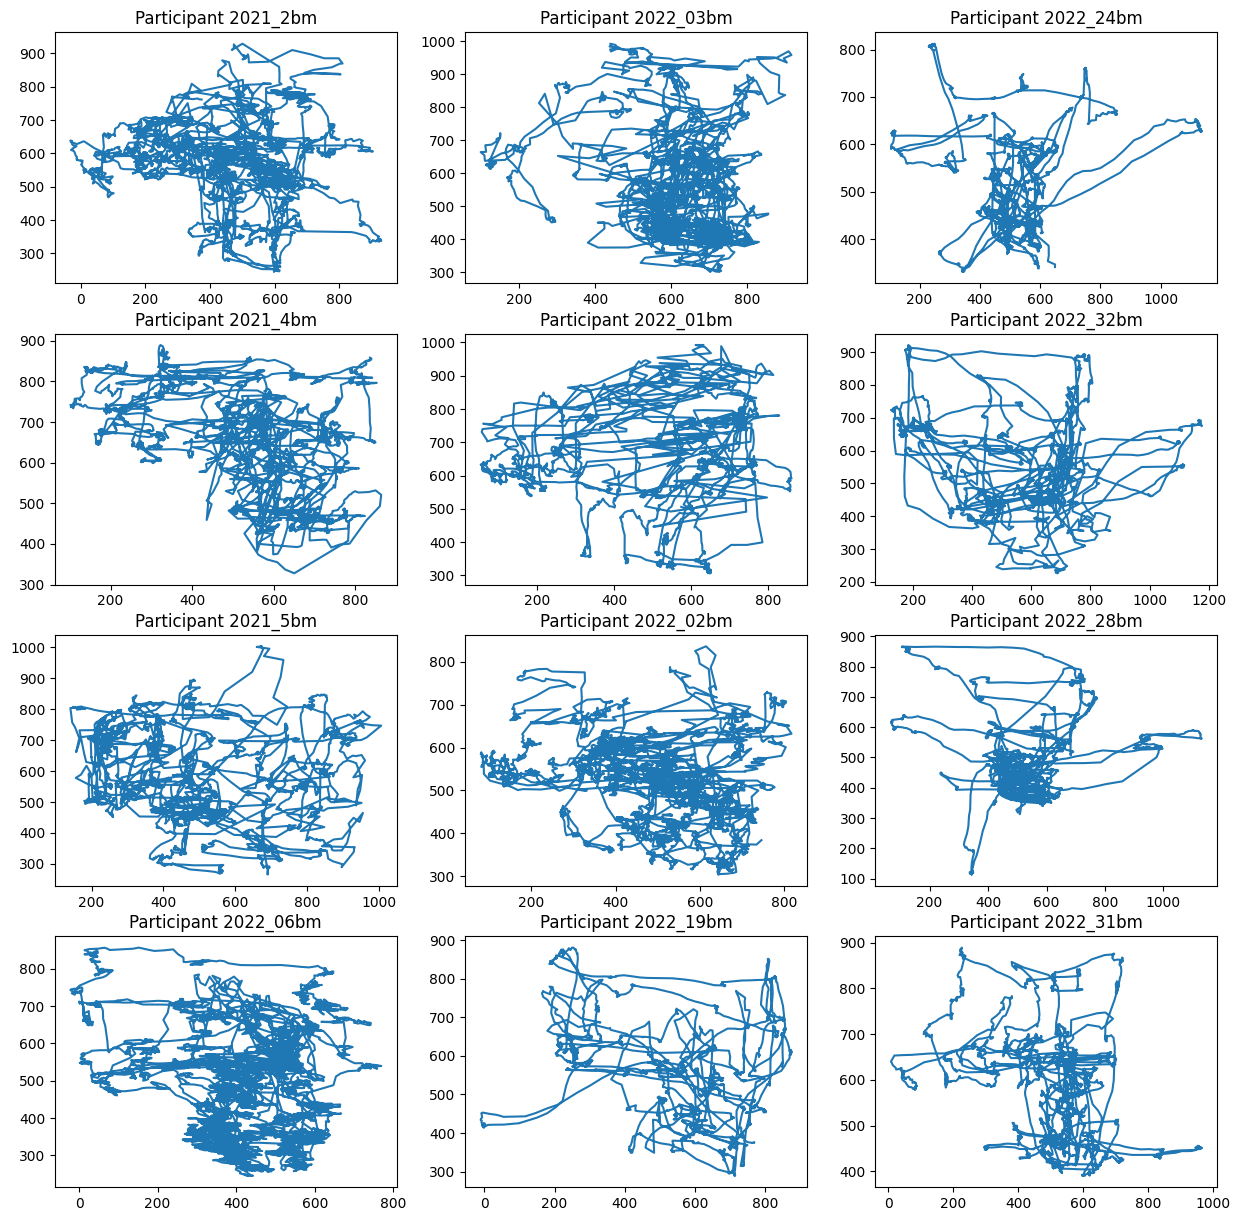

In [4]:
ncols = 3
nrows = 4
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(15, 15),)
current_col = 0
persons_list = list(gaze_df['folder_id'].unique())
for current_col in range(ncols):
    for current_row in range(nrows):
        current_person = persons_list[nrows*current_col + current_row]
        temp = gaze_df[gaze_df['folder_id'] == current_person]
        axs[current_row, current_col].plot(temp['gaze x [px]'], temp['gaze y [px]'])
        axs[current_row, current_col].set_title(f"Participant {current_person}")

plt.show()

### Vector Auto Regressive Time Series

In [8]:
limit_persons = 10
filter_persons_list = persons_list[0:limit_persons]
analysis_df = gaze_df[gaze_df['folder_id'].isin(filter_persons_list)]
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)
    for key,val in result[4].items():
        out[f'critical value ({key})']=val
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

adf_test(analysis_df['gaze x [px]'])
adf_test(analysis_df['gaze y [px]'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -1.204003e+01
p-value                 2.745899e-22
# lags used             2.300000e+01
# observations          1.279120e+05
critical value (1%)    -3.430401e+00
critical value (5%)    -2.861563e+00
critical value (10%)   -2.566782e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary
Augmented Dickey-Fuller Test: 
ADF test statistic     -1.171034e+01
p-value                 1.494242e-21
# lags used             2.500000e+01
# observations          1.279100e+05
critical value (1%)    -3.430401e+00
critical value (5%)    -2.861563e+00
critical value (10%)   -2.566782e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary
